# Neural Network - MNIST

The MNIST database of handwritten digits, available from this page, has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.


In [15]:
import numpy as np
import pandas as pd
import random

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_mldata

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

#### Fetching the MNIST Original data using sklearn's fetch_mldata

In [58]:
mnist = fetch_mldata('MNIST original')
X, y = mnist["data"], mnist["target"]

/Users/rohanchoudhari/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
/Users/rohanchoudhari/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


To keep our gradients manageable, we normalize the data

In [59]:
X = X / 255
labels = 10

We need to first reshape 'y'. 'y' currently is a row representing the corresponding label. We reshape it into a column representing the corresponding label.

In [60]:
r = y.shape[0]
y_plot = y
y = y.reshape(1, r)

Y_new = np.eye(labels)[y.astype('int32')]
Y_new = Y_new.T.reshape(labels, r)

#### Test-train split

In [21]:
m = 60000
m_test = X.shape[0] - m

X_train, X_test = X[:m].T, X[m:].T
Y_train, Y_test = Y_new[:,:m], Y_new[:,m:]

shuffle_index = np.random.permutation(m)
X_train, Y_train = X_train[:, shuffle_index], Y_train[:, shuffle_index]

MNIST images are 28x28 pixels and each pixel has a greyscale value. We say that each pixel is a neuron and the neuron holds the greyscale value - 0 for a white pixel and 1 for a black pixel.

#### Plotting a grayscale image

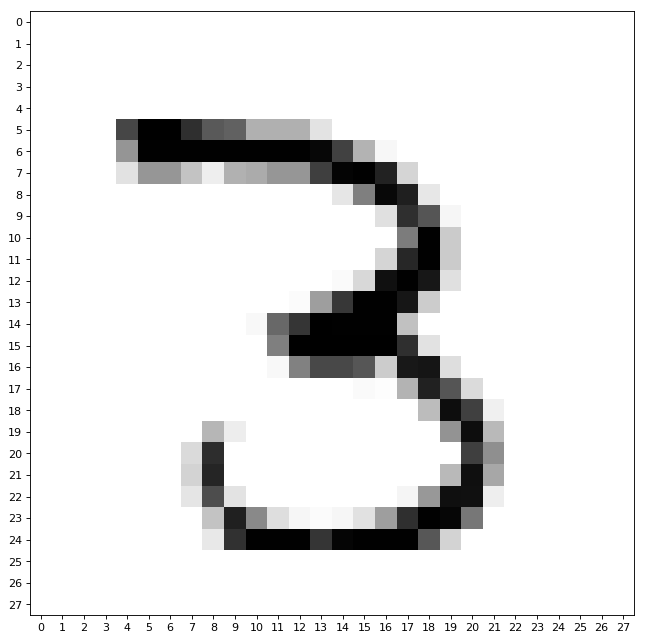

In [22]:
i = random.randint(0, 1000)

sample_plot = X_train[:,i].reshape(28,28)
figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
plt.imshow(sample_plot, cmap = matplotlib.cm.binary)
plt.axis("on")
x = y = range(0, 28)
xi = yi = [i for i in range(0, len(x))]

plt.xticks(xi, x)
plt.yticks(yi, y)

plt.show()

#### Checking the corresponding one-hot encoding

In [85]:
for idx, num in enumerate((Y_train[:,i])):
    print(repr(idx) + ": " + repr(int(num)))

0: 0
1: 1
2: 0
3: 0
4: 0
5: 0
6: 0
7: 0
8: 0
9: 0


The greyscale value also represents the pixel's activation number. I have printed out the grey scale values for the 28x28 image and we can see that a group of neurons in the middle are activated i.e. have a greyscale value greater than 0.

In [61]:
y_plot = y_plot.tolist()

### Peek at the images of each type

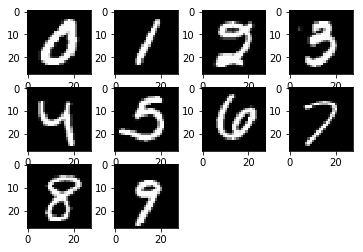

In [83]:
for i in range(0, 10):
    idx = y_plot.index(i)+random.randint(0, 500)    
    plt.subplot(3, 4,i+1)
    plt.imshow(X[idx].reshape(28,28), cmap='gray', interpolation='none')

0: 0
1: 1
2: 0
3: 0
4: 0
5: 0
6: 0
7: 0
8: 0
9: 0


### Looks good!

### Building the neural network

Like I've said above, each pixel is a neuron and its grayscale value is its activation number.

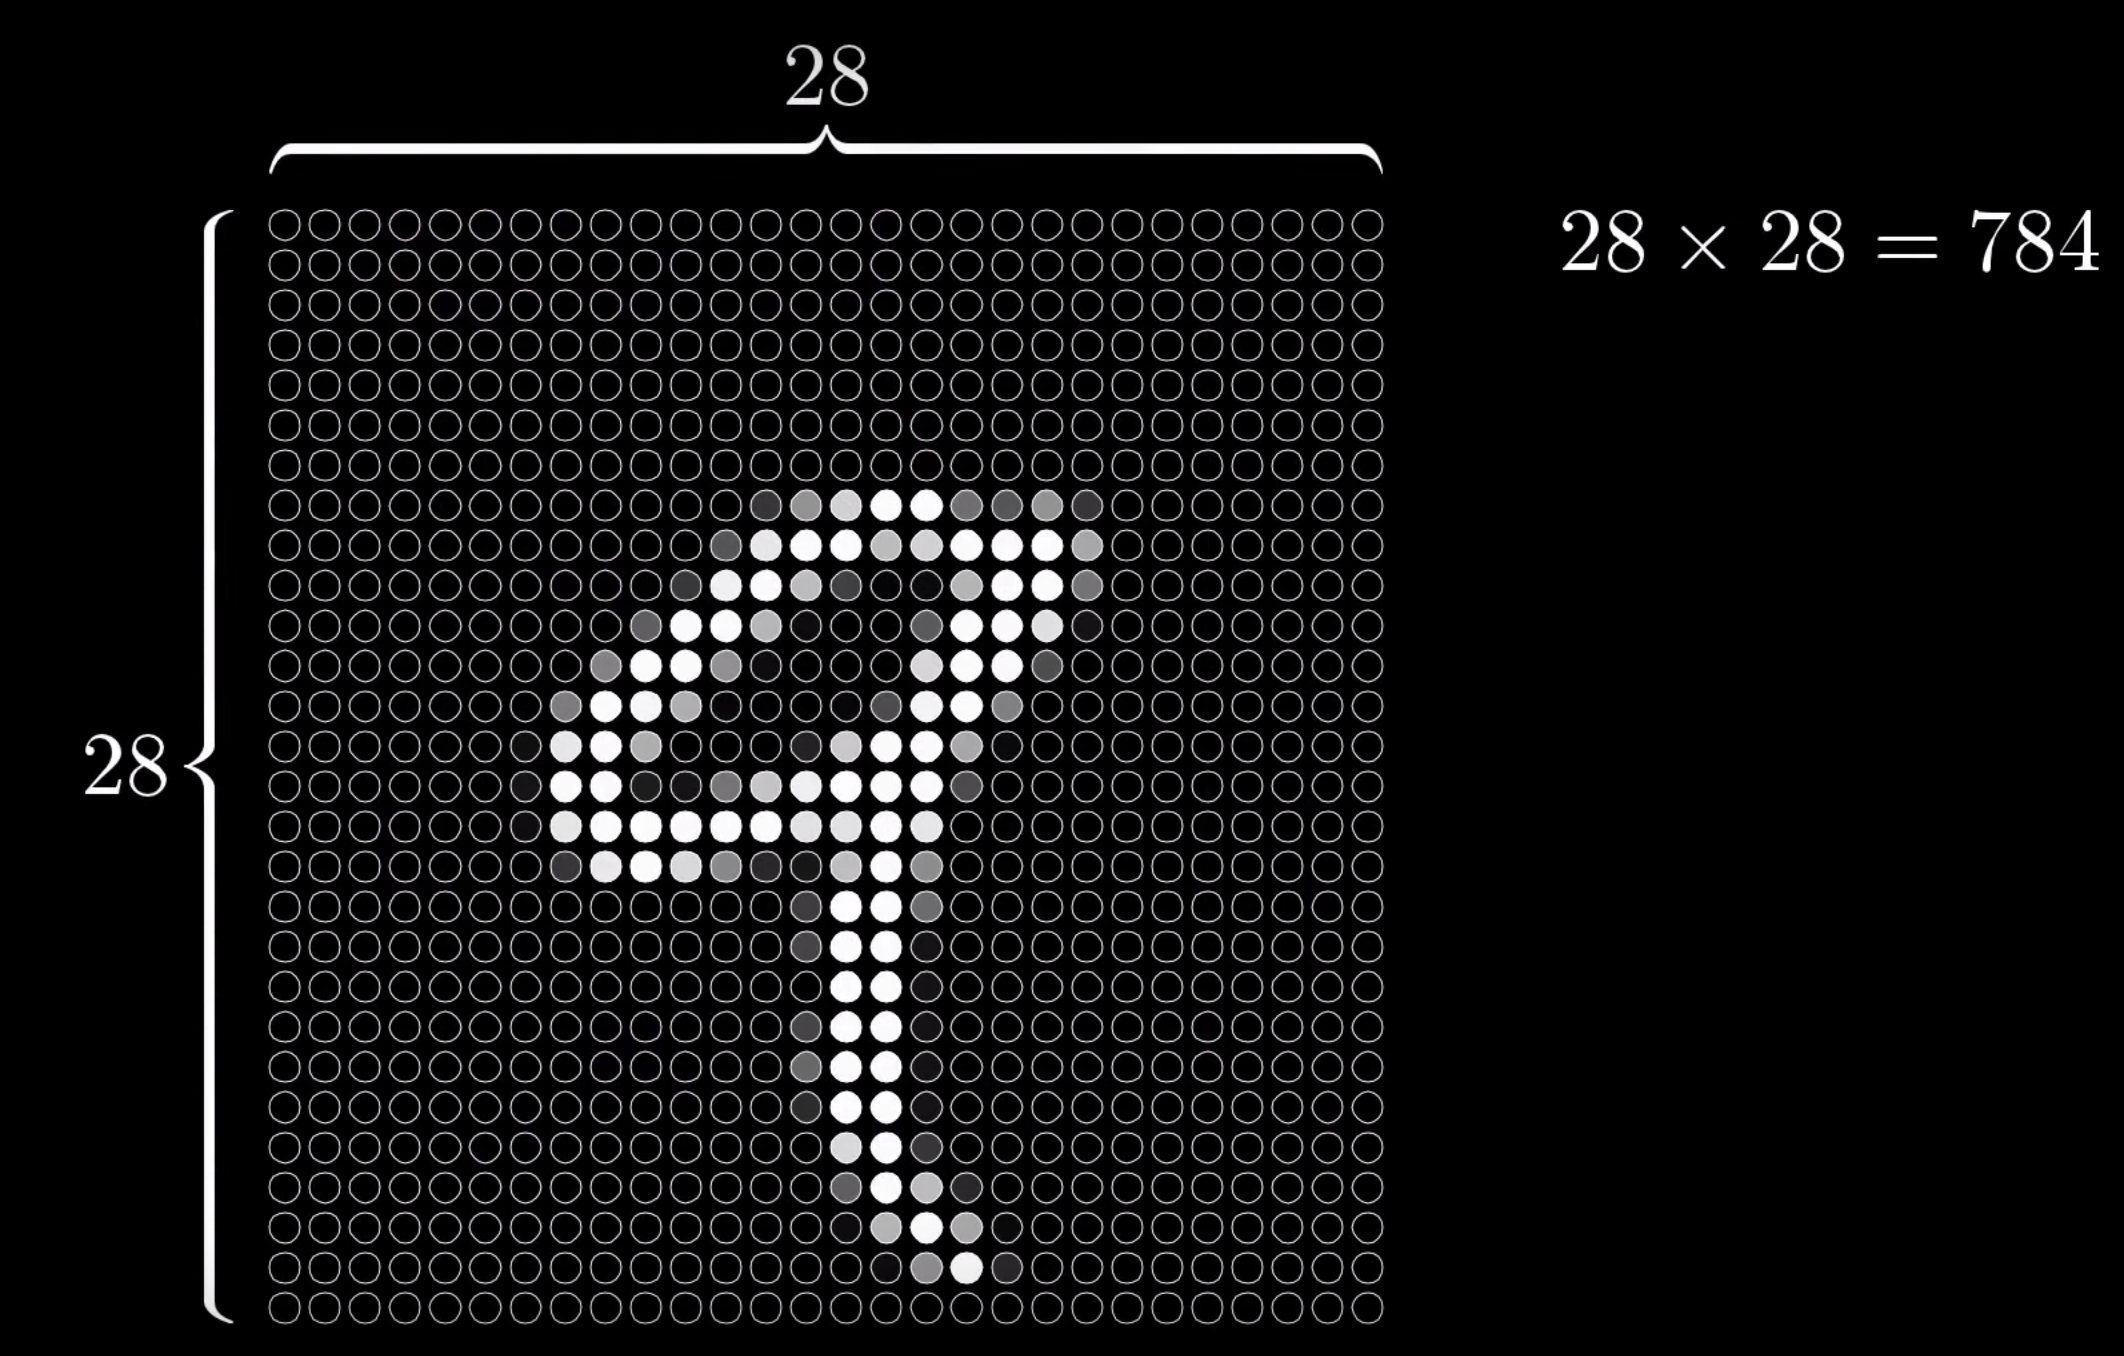

We reshape the 28x28 list of list into a 784x1 list and it becomes our first "layer"

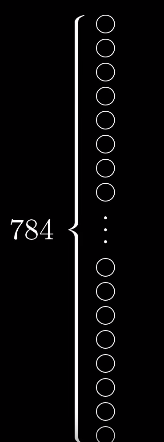

The neurons in this layer are "activated" depending on the "activation number" of each neuron. There's n number of hidden layers. Between any two layers, there are connections. All neurons in the left layer are connected to each neuron in the right layer. Each of these connections are assigned a weight which is just a number.
We then take the weight of these connections and we use the activation numbers to compute the weighted sum.

This weighted sum will represent the activation for the neuron in the right layer and therefore we need its value to lie between 0 and 1. We use the Sigmoid function or the logistic curve to compress the weighted sum value into a value between 0 and 1.

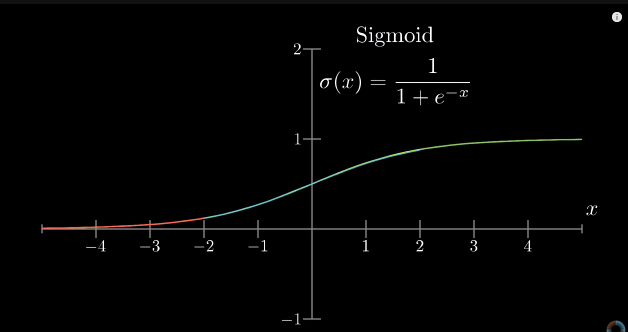

In [8]:
def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s

### Cross Entropy Loss Function

Cross-entropy loss, or log loss, measures the performance of a classification model whose output is a probability value between 0 and 1. Cross-entropy loss increases as the predicted probability diverges from the actual label. So predicting a probability of .012 when the actual observation label is 1 would be bad and result in a high loss value. A perfect model would have a log loss of 0.

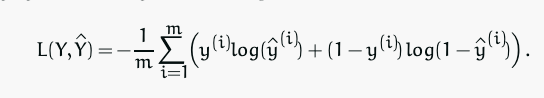

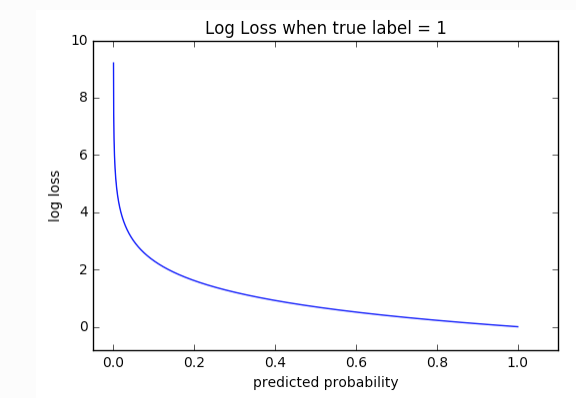

In [9]:
def compute_multiclass_loss(Y, Y_hat):

    L_sum = np.sum(np.multiply(Y, np.log(Y_hat)))
    m = Y.shape[1]
    L = -(1/m) * L_sum

    return L

In [10]:
n_x = X_train.shape[0]
n_h = 64
learning_rate = 1

W1 = np.random.randn(n_h, n_x)
b1 = np.zeros((n_h, 1))
W2 = np.random.randn(labels, n_h)
b2 = np.zeros((labels, 1))

X = X_train
Y = Y_train

for i in range(4000):

    Z1 = np.matmul(W1,X) + b1
    A1 = sigmoid(Z1)
    Z2 = np.matmul(W2,A1) + b2
    A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=0)

    cost = compute_multiclass_loss(Y, A2)

    dZ2 = A2-Y
    dW2 = (1./m) * np.matmul(dZ2, A1.T)
    db2 = (1./m) * np.sum(dZ2, axis=1, keepdims=True)

    dA1 = np.matmul(W2.T, dZ2)
    dZ1 = dA1 * sigmoid(Z1) * (1 - sigmoid(Z1))
    dW1 = (1./m) * np.matmul(dZ1, X.T)
    db1 = (1./m) * np.sum(dZ1, axis=1, keepdims=True)

    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1

    if (i % 100 == 0):
        print("Epoch", i, "cost: ", cost)

print("Final cost:", cost)

Epoch 0 cost:  9.10671059032991
Epoch 100 cost:  0.7201933074794842
Epoch 200 cost:  0.5429861858819061
Epoch 300 cost:  0.4657492025874882
Epoch 400 cost:  0.4198375239608161
Epoch 500 cost:  0.3882501185114092
Epoch 600 cost:  0.3645309458910456
Epoch 700 cost:  0.34565986858325953
Epoch 800 cost:  0.3300651217636393
Epoch 900 cost:  0.3168271494089262
Epoch 1000 cost:  0.30535144313068724
Epoch 1100 cost:  0.2952371288651989
Epoch 1200 cost:  0.28620282247975687
Epoch 1300 cost:  0.2780432018310259
Epoch 1400 cost:  0.2706045120395501
Epoch 1500 cost:  0.2637688672251019
Epoch 1600 cost:  0.25744387699123467
Epoch 1700 cost:  0.2515561278023311
Epoch 1800 cost:  0.24604693901947086
Epoch 1900 cost:  0.24086913093690793
Epoch 2000 cost:  0.2359844441038008
Epoch 2100 cost:  0.23136158578838673
Epoch 2200 cost:  0.22697478926616801
Epoch 2300 cost:  0.22280268250788157
Epoch 2400 cost:  0.2188272652828104
Epoch 2500 cost:  0.21503296999842317
Epoch 2600 cost:  0.21140593630921914
Epoc

### Accuracy of the model

In [11]:
Z1 = np.matmul(W1, X_test) + b1
A1 = sigmoid(Z1)
Z2 = np.matmul(W2, A1) + b2
A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=0)

predictions = np.argmax(A2, axis=0)
labels = np.argmax(Y_test, axis=0)

print(confusion_matrix(predictions, labels))
print(classification_report(predictions, labels))

[[ 957    0    8    3    1    5    9    0    6    6]
 [   0 1117    5    2    0    2    2    9    3    7]
 [   3    3  943   19    6    3    3   21    7    3]
 [   1    2   20  936    2   20    0    9   23    5]
 [   1    1   11    1  913    8    8    8    9   27]
 [   5    2    5   17    2  816   15    2   13   12]
 [   9    3    7    1    9   11  916    0    3    1]
 [   1    2   13   10    6    6    2  952   12   21]
 [   3    5   16   15    6   15    3    5  894   16]
 [   0    0    4    6   37    6    0   22    4  911]]
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       995
           1       0.98      0.97      0.98      1147
           2       0.91      0.93      0.92      1011
           3       0.93      0.92      0.92      1018
           4       0.93      0.93      0.93       987
           5       0.91      0.92      0.92       889
           6       0.96      0.95      0.96       960
           7       0.93      0.93   